# Section 1: **Introduction and Rationale**

## Brief Description of the Dataset

//todo

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind

In [11]:
lfs_df = pd.read_csv('./data/LFS PUF April 2016.csv')

In [12]:
lfs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

In [13]:
print(len(lfs_df))
print(len(lfs_df.columns))

180862
50


There are 180862 total observations and 50 total variables.

The variable list consists of these variables that can be categorized into certain categories for easier reference:

**Demographic Variables**:
* `PUFREG`: Region (categorical)
* `PUFPRV`: Province code (categorical)
* `PUFPRRCD`: Province recode (categorical)
* `PUFHHSIZE`: Number of household members (numerical)
* `PUFC04_SEX`: Sex of the person (binary categorical)
* `PUFC05_AGE`: Age of the person (numerical)
* `PUFC06_MSTAT`: Marital status of the person (categorical)
* `PUFC07_GRADE`: Highest grade completed (numerical)

**Education Variables**:
* `PUFC08_CURSCH`: Currently attending school (binary categorical)
* `PUFC09_GRADTECH`: Graduate of a technical/vocational course (binary categorical)

**Employment Variables**:
* `PUFC11_WORK`: Worked in the past week (binary categorical)
* `PUFC12_JOB`: Had a job/business in the past week (binary categorical)
* `PUFC14_PROCC`: Primary occupation (categorical)
* `PUFC16_PKB`: Kind of business or industry (categorical)
* `PUFC17_NATEM`: Nature of employment (categorical)
* `PUFC18_PNWHRS`: Normal working hours per day (numerical)
* `PUFC19_PHOURS`: Total hours worked in the past week (numerical)
* `PUFC20_PWMORE`: Want more hours of work (binary categorical)
* `PUFC21_PLADDW`: Looked for additional work (binary categorical)
* `PUFC22_PFWRK`: First time doing any work (binary categorical)
* `PUFC23_PCLASS`: Class of worker for primary occupation (categorical)
* `PUFC24_PBASIS`: Basis of payment for primary occupation (categorical)
* `PUFC25_PBASIC`: Basic pay per day (numerical)
* `PUFC26_OJOB`: Had another job/business (binary categorical)
* `PUFC27_NJOBS`: Number of jobs in the past week (numerical)
* `PUFC28_THOURS`: Total hours worked for all jobs (numerical)
* `PUFNEWEMPSTAT`: New Employment Criteria (categorical)

**Job Search Variables**:
* `PUFC30_LOOKW`: Looked for work or tried to establish a business (binary categorical)
* `PUFC31_FLWRK`: First time looking for work (binary categorical)
* `PUFC32_JOBSM`: Job search method (categorical)
* `PUFC33_WEEKS`: Weeks spent looking for work (numerical)
* `UFC34_WYNOT`: Reason for not looking for work (categorical)
* `PUFC35_LTLOOKW`: Last time looked for work (numerical)
* `PUFC36_AVAIL`: Available for work (binary categorical)
* `PUFC37_WILLING`: Willing to take up work (binary categorical)
* `PUFC38_PREVJOB`: Worked at any time before (binary categorical)
* `PUFC40_POCC`: Last occupation (categorical)
* `PUFC41_WQTR`: Worked or had a job during the past quarter (binary categorical)
* `PUFC43_QKB`: Kind of business for the past quarter (categorical)

**Date Variables**:
* `PUFSVYMO`: Survey month (numerical)
* `PUFSVYYR`: Survey year (numerical)
* `PUFPSU`: PSU number (numerical)
* `PUFRPL`: Replicate (numerical)
* `PUFPWGTFIN`: Final weight based on projection (numerical)

Source: https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016

Given these variables, the group has chosen to exclude these obsolete values that have been represented in another variable, or are not needed for analysis:
* `PUFSVYMO`: Survey month (numerical)
* `PUFSVYYR`: Survey year (numerical)
* `PUFPSU`: PSU number (numerical)
* `PUFRPL`: Replicate (numerical)
* `PUFPWGTFIN`: Final weight based on projection (numerical)
* `PUFPRV`: Province code (categorical)
* `PUFPRRCD`: Province recode (categorical)

We will be cross referencing the responses with a valueset provided alongside the dataset which was uploaded onto google sheets for easier viewing: https://docs.google.com/spreadsheets/d/1y1n2LIWIda9aI5Cur8I5_HXIJUDbuXewTbNlI1y1uEU/edit?usp=sharing

# Section 2: **Data Cleaning**

To start with the data cleaning, we first need to exclude the variables we will not be working with. We will save the filtered dataset as jobs_df.

In [14]:
exclude_vars = ['PUFSVYMO', 'PUFSVYYR', 'PUFPSU', 'PUFRPL', 'PUFPWGTFIN', 'PUFPRV', 'PUFPRRCD']
jobs_df = lfs_df.drop(columns=exclude_vars).copy()
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PUFREG           180862 non-null  int64 
 1   PUFHHNUM         180862 non-null  int64 
 2   PUFURB2K10       180862 non-null  int64 
 3   PUFHHSIZE        180862 non-null  int64 
 4   PUFC01_LNO       180862 non-null  int64 
 5   PUFC03_REL       180862 non-null  int64 
 6   PUFC04_SEX       180862 non-null  int64 
 7   PUFC05_AGE       180862 non-null  int64 
 8   PUFC06_MSTAT     180862 non-null  object
 9   PUFC07_GRADE     180862 non-null  object
 10  PUFC08_CURSCH    180862 non-null  object
 11  PUFC09_GRADTECH  180862 non-null  object
 12  PUFC10_CONWR     180862 non-null  object
 13  PUFC11_WORK      180862 non-null  object
 14  PUFC12_JOB       180862 non-null  object
 15  PUFC14_PROCC     180862 non-null  object
 16  PUFC16_PKB       180862 non-null  object
 17  PUFC17_NAT

First, we check for duplicate data or NaN values in the original dataframe before grouping the selected variables together.

In [15]:
duplicate_count = jobs_df.duplicated().sum()
duplicate_count

np.int64(0)

In [16]:
null_count = jobs_df.isnull().sum()
null_count

PUFREG             0
PUFHHNUM           0
PUFURB2K10         0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR        0
PUFC43_QKB         0
PUFNEWEMPSTAT      0
dtype: int64

There seems to be no duplicates or null values. We can proceed with the cleaning of the individual variables.

In [17]:
jobs_df.head(20)

,PUFREG,PUFHHNUM,PUFURB2K10,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,1,2,3,1,1,1,49,2,350,...,,,,,,,,1,01,1
1,1,1,2,3,2,2,2,61,2,350,...,,,,,,,,1,01,1
2,1,1,2,3,3,3,1,19,1,350,...,,,,,,,,1,01,1
3,1,2,2,4,1,1,1,48,2,320,...,,,,,,,,1,01,1
4,1,2,2,4,2,2,2,41,2,350,...,,,,,,,,1,96,1
5,1,2,2,4,3,3,1,20,1,350,...,,,,,,,,1,01,1
6,1,2,2,4,4,3,2,15,1,320,...,,8,,,,2,,,,3
7,1,3,2,4,1,1,1,59,2,350,...,,,,,,,,1,01,1
8,1,3,2,4,2,2,2,61,2,350,...,,,,,,,,1,84,1
9,1,3,2,4,3,6,2,11,1,250,...,,,,,,,,,,


There still seems to be blank values, though, after consulting the valueset, they are the corresponding value to "not-applicable" answers, which we will change to be more readable in the preprocessing phase.

## Binary Categorical Variable Preprocessing

We can start our data cleaning process with binary categorical variables.

As we can see, there are some rows with blank responses, and according to the valueset, this is interpreted as "not applicable".

In [18]:
jobs_df[['PUFC08_CURSCH', 'PUFC26_OJOB']]

,PUFC08_CURSCH,PUFC26_OJOB
0,,1
1,,2
2,2,1
3,,1
4,,2
...,...,...
180857,,2
180858,,
180859,,
180860,,


Given that these variables have binary responses, it would be more appropriate to change them into boolean datatypes for a more appropriate data representation.

To transform them into a boolean datatype, we have to first see the value counts of each specific variable in order to limit the responses into either 1 or 0.

In [19]:
jobs_df['PUFC08_CURSCH'].value_counts()

PUFC08_CURSCH
     107137
1     51643
2     22082
Name: count, dtype: int64

In [20]:
jobs_df['PUFC26_OJOB'].value_counts()

PUFC26_OJOB
     109507
2     65417
1      5938
Name: count, dtype: int64

### Attending School variable & Secondary Job variable

Given these responses and cross referencing these responses with the valueset provided along with the dataset, we are able to first understand what each of these responses mean.

* `PUC08_CURSCH` responses represent whether the respondent is currently attending school or not.
* `PUFC26_OJOB`  responses represents whether the respondent currently has another job aside from their primary occupation.

Valuset dictates that:
* 1 = Yes
* 2 = No
* blank = Not Applicable

Given these representations, we are then able to convert and combine them into 2 distinct responses by combining No(2), and Not Applicable(blank) into False(0), and leaving Yes as True(1).

We first do this by combining the responses first, then changing the datatype later.

In [21]:
jobs_df['PUFC08_CURSCH'] = jobs_df['PUFC08_CURSCH'].replace({'2': 0, ' ': 0})
jobs_df['PUFC26_OJOB'] = jobs_df['PUFC26_OJOB'].replace({'2': 0, ' ': 0})

In [22]:
jobs_df['PUFC08_CURSCH'].value_counts()

PUFC08_CURSCH
0    129219
1     51643
Name: count, dtype: int64

In [23]:
jobs_df['PUFC26_OJOB'].value_counts()

PUFC26_OJOB
0    174924
1      5938
Name: count, dtype: int64

In [24]:
jobs_df['PUFC08_CURSCH'] = jobs_df['PUFC08_CURSCH'].astype(bool)
jobs_df['PUFC26_OJOB'] = jobs_df['PUFC26_OJOB'].astype(bool)

In [25]:
jobs_df['PUFC08_CURSCH'].value_counts()

PUFC08_CURSCH
False    129219
True      51643
Name: count, dtype: int64

In [26]:
jobs_df['PUFC26_OJOB'].value_counts()

PUFC26_OJOB
False    174924
True       5938
Name: count, dtype: int64

In [27]:
jobs_df[['PUFC08_CURSCH', 'PUFC26_OJOB']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   PUFC08_CURSCH  180862 non-null  bool 
 1   PUFC26_OJOB    180862 non-null  bool 
dtypes: bool(2)
memory usage: 353.4 KB


## Categorical Variable Preprocessing

Now that we've converted the binary category variables into their respective datatypes and responses, we move on to the other categorical variables.

### Sex variable

Starting off with `PUFC04_SEX` which is the sex of the respondent, according to the valueset,
* 1 = Male
* 2 = Female

Therefore we may opt to change the numbers into characters M and F for easier readability.

In [28]:
jobs_df[['PUFREG', 'PUFC16_PKB', 'PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC04_SEX']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   PUFREG        180862 non-null  int64 
 1   PUFC16_PKB    180862 non-null  object
 2   PUFC14_PROCC  180862 non-null  object
 3   PUFC17_NATEM  180862 non-null  object
 4   PUFC04_SEX    180862 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.9+ MB


In [29]:
jobs_df['PUFC04_SEX'].value_counts()

PUFC04_SEX
1    91539
2    89323
Name: count, dtype: int64

We change the datatype to the 'category' from object first.

In [30]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].astype('category')

In [31]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({2: 'F', 1: 'M'})
jobs_df['PUFC04_SEX'].value_counts()

C:\Users\Marcus\AppData\Local\Temp\ipykernel_9636\1489607154.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({2: 'F', 1: 'M'})


PUFC04_SEX
M    91539
F    89323
Name: count, dtype: int64

### Nature of Employment variable

Moving on to the variable `PUFC17_NATEM`, which represents the nature of employment of each respondent,
* 1 = Permanent Job
* 2 = Short-term
* 3 = Different employer
* blank = Not applicable/no employment

Since our aim will be to focus on the respondents who are employed, we drop all respondents who are not employed.

In [32]:
(jobs_df['PUFC17_NATEM'] != ' ').sum()

np.int64(71355)

This will narrow down our dataframe to 71355 respondents.

In [33]:
jobs_df = jobs_df[jobs_df['PUFC17_NATEM'] != ' ']
jobs_df.head(20)

,PUFREG,PUFHHNUM,PUFURB2K10,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,1,2,3,1,1,M,49,2,350,...,,,,,,,,1,01,1
1,1,1,2,3,2,2,F,61,2,350,...,,,,,,,,1,01,1
2,1,1,2,3,3,3,M,19,1,350,...,,,,,,,,1,01,1
3,1,2,2,4,1,1,M,48,2,320,...,,,,,,,,1,01,1
4,1,2,2,4,2,2,F,41,2,350,...,,,,,,,,1,96,1
5,1,2,2,4,3,3,M,20,1,350,...,,,,,,,,1,01,1
7,1,3,2,4,1,1,M,59,2,350,...,,,,,,,,1,01,1
8,1,3,2,4,2,2,F,61,2,350,...,,,,,,,,1,84,1
11,1,4,2,4,1,1,M,51,2,350,...,,,,,,,,1,49,1
14,1,4,2,4,4,3,M,23,1,350,...,,,,,,,,1,80,1


### Primary Occupation variable

`PUFC14_PROCC` represents the primary occupation of the respondents.

According to the valueset, the responses are grouped into different bins:
* 11-14 = managers
* 21-26 = professionals
* 31-36 = technicians and associate professionals
* 41-44 = clerical support workers
* 51-54 = service and sales workers
* 61-63 = skilled agricultural, forestry and fishery workers
* 71-75 = craft and related trades workers
* 81-83 = plant and machine operators and assemblers
* 91-96 = elementary occupations
* 1-3 = armed forces occupations

In [34]:
jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
92    9565
61    8499
14    6820
52    5546
93    5239
13    3968
91    3026
83    2823
51    2778
71    2524
62    1963
23    1862
42    1572
54    1529
75    1160
33     963
72     907
41     871
96     851
11     751
53     696
81     683
43     652
22     563
44     533
31     520
12     506
74     499
34     422
24     412
32     405
21     368
73     356
82     320
26     292
94     220
25     174
35     171
95     147
03     100
01      40
02      33
63      26
Name: count, dtype: int64

We can group the different responses into categorical bins and represent their numbers as the title of their occupation.

In [35]:
PUFC14_PROCC_bins = [0, 3, 14, 26, 36, 44, 54, 63, 75, 83, 97]
PUFC14_PROCC_labels = [
    'Armed Forces Occupations',
    'Managers',
    'Professionals',
    'Technicians and Associate Professionals',
    'Clerical Support Workers',
    'Service and Sales Workers',
    'Skilled Agricultural, Forestry and Fishery Workers',
    'Craft and Related Trades Workers',
    'Plant and Machine Operators and Assemblers',
    'Elementary Occupations',
]

To start the binning process, we first have to convert the variable to an integer as it is currently an object.

In [36]:
jobs_df['PUFC14_PROCC'] = jobs_df['PUFC14_PROCC'].astype('int')

Now we start the binning process that the datatype has been modified.

In [37]:
jobs_df['PUFC14_PROCC'] = pd.cut(jobs_df['PUFC14_PROCC'], bins=PUFC14_PROCC_bins, labels=PUFC14_PROCC_labels, right=False)

jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
Elementary Occupations                                21871
Skilled Agricultural, Forestry and Fishery Workers    11991
Professionals                                         10199
Service and Sales Workers                              9553
Managers                                               5325
Craft and Related Trades Workers                       4312
Clerical Support Workers                               3095
Technicians and Associate Professionals                2773
Plant and Machine Operators and Assemblers             2163
Armed Forces Occupations                                 73
Name: count, dtype: int64

In [38]:
jobs_df['PUFC14_PROCC'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC14_PROCC
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.5 KB


The datatype automatically gets converted into 'category' datatype, so no need to convert the datatype.

### Kind of Industry variable

The `PUFC16_PKB` variable dictates the major industry that the respondent works in.

The `PUFC16_PKB` variable has 2 sets of bins, the first one encompassing the general industrty that the respondent works in:
* 1-3 = Agricultural
* 5-43 = Industrial
* 45-99 = Services

The other set of bins being the more specific industry that the respondent works in:
* 1-2 = Agriculture and Forestry
* 3 = Fishing
* 5-9 = Mining and Quarying
* 10-33 = Manufacturing
* 35 = Electricity, Gas, Steam and Airconditioning Supply
* 36-39 = Water Supply; Sewage, Waste Management and Remediation Activities
* 41-43 = Construction
* 45-47 = Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
* 49-53 = Transportation and Storage
* 55-56 = Accommodation and Food Service Activities
* 58-63 = Information and Communication
* 64-66 = Financial and Insurance Activities
* 68 = Real Estate Activities
* 69-75 = Professional, Scientific and Technical Activities
* 77-82 = Administrative and Support Service Activities
* 84 = Public Administration and Defense; Compulsory Social Security
* 85 = Education
* 86-88 = Human Health and Social Work Activities
* 90-93 = Arts, Entertainment and Recreation
* 94-96 = Other Service Activities
* 97-98 = Activities of Households as Employers
* 99 = Activities of Extraterritorial Organizations and Bodies

Given these bins, we can make a separate column that shows the general industry that the respondent works in, while keeping PUFC16_PKB to show their specific industry.

In [39]:
PUFC16_PKB_GENERAL_bins = [0, 3, 43, 99]
PUFC16_PKB_GENERAL_labels = [
    'Agricultural',
    'Industrial',
    'Services']

PUFC16_PKB_bins = [0, 2, 3, 9, 33, 35, 39, 43, 47, 53, 56, 63, 66, 68, 75, 82, 84, 85, 88, 93, 96, 98, 99]
PUFC16_PKB_labels = [
    'Agriculture and Forestry',
    'Fishing',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies'
]

We have to first convert the datatype into the integer datatype in order to bin the responses properly.

In [40]:
jobs_df['PUFC16_PKB'] = jobs_df['PUFC16_PKB'].astype('int')

Now we start the binning process that the datatype has been modified.

In [41]:
jobs_df['PUFC16_PKB_GENERAL'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_GENERAL_bins, labels=PUFC16_PKB_GENERAL_labels, right=False)
jobs_df['PUFC16_PKB_GENERAL'].value_counts()

PUFC16_PKB_GENERAL
Services        39618
Agricultural    17853
Industrial      13874
Name: count, dtype: int64

In [42]:
jobs_df['PUFC16_PKB'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_bins, labels=PUFC16_PKB_labels, right=False)
jobs_df['PUFC16_PKB'].value_counts()

PUFC16_PKB
Agriculture and Forestry                                              17411
Transportation and Storage                                            17014
Construction                                                           5282
Manufacturing                                                          4955
Education                                                              4300
Activities of Households as Employers                                  4235
Mining and Quarying                                                    3269
Human Health and Social Work Activities                                3117
Information and Communication                                          2961
Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles     2568
Administrative and Support Service Activities                          1156
Public Administration and Defense; Compulsory Social Security          1004
Financial and Insurance Activities                                      914
O

In [43]:
jobs_df[['PUFC16_PKB_GENERAL', 'PUFC16_PKB']].head(20)

,PUFC16_PKB_GENERAL,PUFC16_PKB
0,Agricultural,Agriculture and Forestry
1,Agricultural,Agriculture and Forestry
2,Agricultural,Agriculture and Forestry
3,Agricultural,Agriculture and Forestry
4,Services,Activities of Households as Employers
5,Services,Transportation and Storage
7,Agricultural,Agriculture and Forestry
8,Services,Education
11,Services,Transportation and Storage
14,Services,Administrative and Support Service Activities


### Region variable

The last categorical variable, `PUFREG`, which represents the region where the respondent originates from.

The valueset goes as follows:
* 13 = National Capital Region
* 14 = Cordillera Administrative Region
* 1 = Region I - Ilocos Region
* 2 = Region II - Cagayan Valley
* 3 = Region III - Central Luzon
* 4 = Region IVA - CALABARZON
* 17 = Region IVB - MIMAROPA
* 5 = Region V - Bicol
* 6 = Region VI - Western Visayas
* 7 = Region VII - Central Visayas
* 8 = Region VIII - Eastern Visayas
* 9 = Region IX - Zamboanga Peninsula
* 10 = Region X - Northern Mindanao
* 11 = Region XI - Davao
* 12 = Region XII - SOCCSKSARGEN
* 16 = Region XIII - Caraga
* 15 = Autonomous Region in Muslim Mindanao

We can represent these regions better by displaying their name instead of their corresponding number. We can process this easier by using mapping.

In [44]:
jobs_df['PUFREG'].value_counts()

PUFREG
13    10417
3      5451
6      4815
8      4796
7      4512
10     4487
14     4424
5      3928
16     3682
11     3675
17     3540
12     3479
4      3392
9      2747
15     2732
1      2666
2      2612
Name: count, dtype: int64

In [45]:
PUFREG_mapping = {
    13: 'National Capital Region',
    14: 'Cordillera Administrative Region',
    1: 'Region I - Ilocos Region',
    2: 'Region II - Cagayan Valley',
    3: 'Region III - Central Luzon',
    4: 'Region IVA - CALABARZON',
    17: 'Region IVB - MIMAROPA',
    5: 'Region V - Bicol',
    6: 'Region VI - Western Visayas',
    7: 'Region VII - Central Visayas',
    8: 'Region VIII - Eastern Visayas',
    9: 'Region IX - Zamboanga Peninsula',
    10: 'Region X - Northern Mindanao',
    11: 'Region XI - Davao',
    12: 'Region XII - SOCCSKSARGEN',
    16: 'Region XIII - Caraga',
    15: 'Autonomous Region in Muslim Mindanao'
}

In [46]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].map(PUFREG_mapping)
jobs_df['PUFREG'].value_counts()

PUFREG
National Capital Region                 10417
Region III - Central Luzon               5451
Region VI - Western Visayas              4815
Region VIII - Eastern Visayas            4796
Region VII - Central Visayas             4512
Region X - Northern Mindanao             4487
Cordillera Administrative Region         4424
Region V - Bicol                         3928
Region XIII - Caraga                     3682
Region XI - Davao                        3675
Region IVB - MIMAROPA                    3540
Region XII - SOCCSKSARGEN                3479
Region IVA - CALABARZON                  3392
Region IX - Zamboanga Peninsula          2747
Autonomous Region in Muslim Mindanao     2732
Region I - Ilocos Region                 2666
Region II - Cagayan Valley               2612
Name: count, dtype: int64

In [47]:
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


As we can see, the datatype is still left as 'object', we want to convert that to a category to be more appropriate.

In [48]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].astype('category')
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.8 KB


## Numerical Variable Preprocessing

After finishing the required preprocessing for all categorical variables, we move on to the preprocessing for numerical variables.

### Basic Pay variable

In [49]:
jobs_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      shape=(1152,), dtype=object)

In [50]:
# Turning the white space value into NaN
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].replace(r'^\s*$', np.nan, regex=True)

jobs_df['PUFC25_PBASIC'].isnull().sum()

np.int64(34767)

In order to deal with the `NaN` values, we will set the value to 0 and convert the data type into integer to make it easier to work with later on.

We will also convert the data type to `int` to make it easier to work with.

In [51]:
# Setting the null value to 0
jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)

# Setting the dtype to int
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].astype(int)

jobs_df['PUFC25_PBASIC'].unique()

C:\Users\Marcus\AppData\Local\Temp\ipykernel_9636\3495477199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)


array([   0,  250,  115, ...,  728, 1573,  922], shape=(1152,))

Since `0` represent data that we want to disregard, we will tackle the rest of Basic Pay per Day without the `0` values.

We will also visualize our data so we can see the distribution of our data.

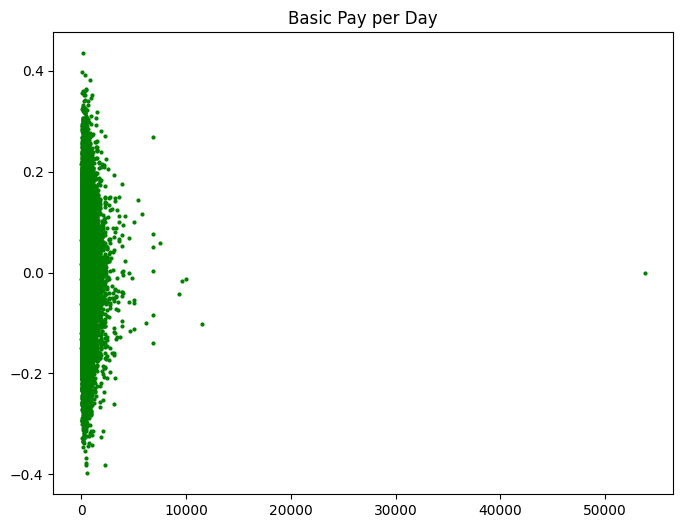

In [52]:
jobs_df = jobs_df[jobs_df['PUFC25_PBASIC'] != 0]

plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since our data is skewed, we will apply log transformation in order to normalize our data.

In [53]:
jobs_df['PUFC25_PBASIC'] = np.log(jobs_df['PUFC25_PBASIC'])

jobs_df['PUFC25_PBASIC']

2         5.521461
4         4.744932
5         5.298317
14        5.814131
15        5.857933
            ...   
180837    5.659482
180844    5.438079
180845    6.805723
180847    5.768321
180848    6.253829
Name: PUFC25_PBASIC, Length: 36588, dtype: float64

We will visualize the data again to check for outliers.

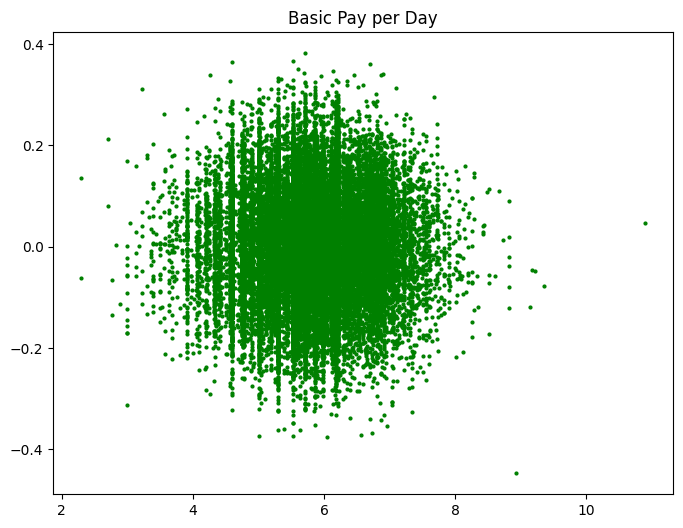

In [54]:
plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since we still have some outliers, we can use the interquartile range and adjust its threshold.

In [55]:
# Computing for the IQR

lbp_q1 = jobs_df['PUFC25_PBASIC'].quantile(0.25)
lbp_q3 = jobs_df['PUFC25_PBASIC'].quantile(0.75)
lbp_iqr = lbp_q3 - lbp_q1

# Computing for the adjusted IQR thresholds

lbp_lw = lbp_q1 - 2 * lbp_iqr
lbp_uw = lbp_q3 + 2 * lbp_iqr

# Removing the outliers from the DF
jobs_df = jobs_df[(jobs_df['PUFC25_PBASIC'] >= lbp_lw) & (jobs_df['PUFC25_PBASIC'] <= lbp_uw)]

outlier_count_after = jobs_df[(jobs_df['PUFC25_PBASIC'] < lbp_lw) | (jobs_df['PUFC25_PBASIC'] > lbp_uw)].shape[0]
print("Number of outliers:", outlier_count_after)

Number of outliers: 0


### Age variable

`PUFC05_AGE` represents the age of the respondent as of their last birthday.

We first need to assess what range we are dealing with for the age.

In [56]:
jobs_df['PUFC05_AGE'].unique()

array([19, 41, 20, 23, 71, 54, 27, 46, 38, 35, 51, 22, 44, 40, 26, 45, 52,
       55, 30, 62, 33, 29, 24, 21, 34, 25, 37, 43, 17, 60, 28, 42, 50, 58,
       57, 36, 18, 70, 48, 47, 61, 31, 32, 49, 39, 68, 53, 16, 56, 65, 63,
       59, 69, 87, 64, 75, 76, 15, 66, 67, 72, 85, 74, 83, 73, 77, 79, 78,
       80, 91, 81, 99, 82])

We can see that some of the unique variables go above your typical working age so we need to check if there are outliers within our data.

In [57]:
jobs_df['PUFC05_AGE'] = jobs_df['PUFC05_AGE'].astype(float)

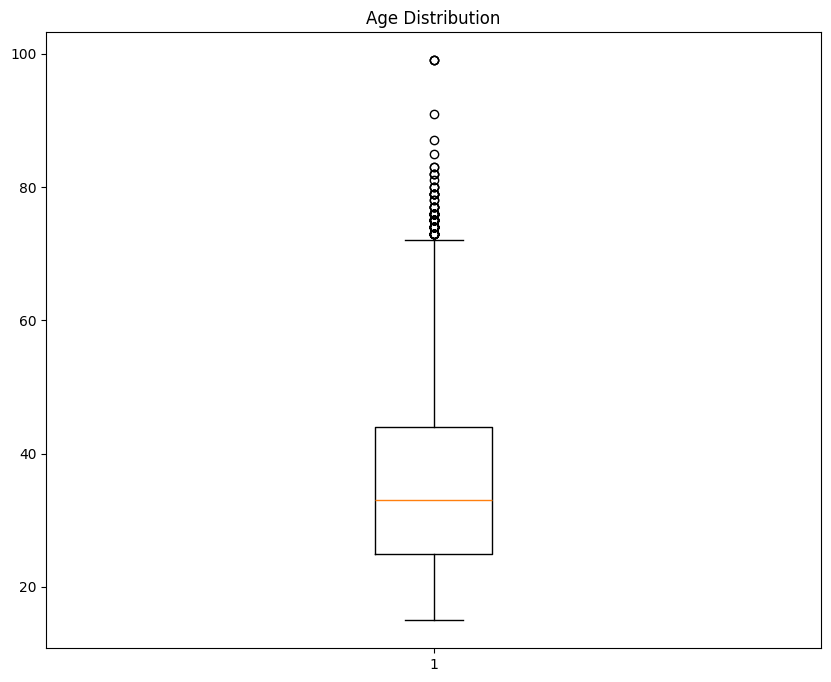

In [58]:
# Initial Boxplot for the Age Distribution

plt.figure(figsize=(10, 8))
plt.boxplot(x=jobs_df['PUFC05_AGE'])
plt.title('Age Distribution')
plt.show()

Using the boxplot, we can easily spot the outliers in our data represented by the circles.

Since the outliers seem to be fairly manageable, we can do mean imputation to normalize the data.

In [59]:
# Computing for the IQR

age_q1 = jobs_df['PUFC05_AGE'].quantile(0.25)
age_q3 = jobs_df['PUFC05_AGE'].quantile(0.75)
age_iqr = age_q3 - age_q1

# Getting the outliers

age_lw = age_q1 - 2 * age_iqr
age_uw = age_q3 + 2 * age_iqr
age_outliers = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)]
age_outliers['PUFC05_AGE'].shape[0]

8

Let's get the mean of the ages without the outliers

In [60]:
mean_val = jobs_df[(jobs_df['PUFC05_AGE'] >= age_lw) & (jobs_df['PUFC05_AGE'] <= age_uw)]['PUFC05_AGE'].mean()
mean_val

np.float64(35.33282069590531)

After getting the mean, we will use it to set the values of the outliers for the mean imputation.

In [61]:
jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val
outlier_count_after = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)].shape[0]
print("Number of outliers after imputation:", outlier_count_after)

Number of outliers after imputation: 0


### Work Hours per Day variable

`PUFC18_PNWHRS` represent the different normal working hours per day ranging from 1 to 16.

In [62]:
jobs_df['PUFC18_PNWHRS'].unique()

array(['08', '12', '04', '10', '09', '06', '03', '05', '07', '01', '02',
       '15', '11', '14', '16', '13'], dtype=object)

We can convert this data into an integer type in order to easily work with the data later on.

In [63]:
jobs_df['PUFC18_PNWHRS'] = jobs_df['PUFC18_PNWHRS'].astype(int)
jobs_df['PUFC18_PNWHRS'].unique()

array([ 8, 12,  4, 10,  9,  6,  3,  5,  7,  1,  2, 15, 11, 14, 16, 13])

### Total Work Hours variable

`PUFC19_PHOURS` represent the total work hours in the past week, including the primary and secondary occupation (if any).

The value set includes numbers ranging from 0 to 112, for the work hours wherein 0 represents the non-workers in the survey and 999 for not reported.

In [64]:
jobs_df['PUFC19_PHOURS'].unique()

array(['024', '072', '048', '060', '016', '040', '070', '045', '032',
       '054', '042', '006', '028', '008', '030', '056', '036', '020',
       '015', '009', '021', '084', '000', '050', '018', '012', '014',
       '004', '035', '044', '090', '077', '049', '025', '052', '064',
       '059', '057', '010', '027', '063', '066', '003', '112', '096',
       '078', '091', '098', '022', '055', '007', '002', '058', '005',
       '075', '033', '105', '062', '031', '011', '034', '026', '094',
       '065', '001', '039', '041', '092', '046', '038', '051', '080',
       '074', '068', '061', '019', '088', '069', '073', '082', '013',
       '081', '053', '043', '047', '067', '037', '108'], dtype=object)

The data does not include 0 and 999 anymore as we have been able to filter the data previously to only accommodate the working respondents.

However, similar to our previous variable, we can also convert the data type into integer so it will be easier to work with it later on.

In [65]:
jobs_df['PUFC19_PHOURS'] = jobs_df['PUFC19_PHOURS'].astype(int)
jobs_df['PUFC19_PHOURS'].unique()

array([ 24,  72,  48,  60,  16,  40,  70,  45,  32,  54,  42,   6,  28,
         8,  30,  56,  36,  20,  15,   9,  21,  84,   0,  50,  18,  12,
        14,   4,  35,  44,  90,  77,  49,  25,  52,  64,  59,  57,  10,
        27,  63,  66,   3, 112,  96,  78,  91,  98,  22,  55,   7,   2,
        58,   5,  75,  33, 105,  62,  31,  11,  34,  26,  94,  65,   1,
        39,  41,  92,  46,  38,  51,  80,  74,  68,  61,  19,  88,  69,
        73,  82,  13,  81,  53,  43,  47,  67,  37, 108])